# Рекомендация тарифов

Оператор мобильной связи «Мегалайн» выяснил: многие клиенты пользуются архивными тарифами. Они хотят построить систему, способную проанализировать поведение клиентов и предложить пользователям новый тариф: «Смарт» или «Ультра».

В вашем распоряжении данные о поведении клиентов, которые уже перешли на эти тарифы (из проекта курса «Статистический анализ данных»). Нужно построить модель для задачи классификации, которая выберет подходящий тариф. Предобработка данных не понадобится — вы её уже сделали.

Постройте модель с максимально большим значением *accuracy*. Чтобы сдать проект успешно, нужно довести долю правильных ответов по крайней мере до 0.75. Проверьте *accuracy* на тестовой выборке самостоятельно.

**Описание данных**

Каждый объект в наборе данных — это информация о поведении одного пользователя за месяц. Известно:
* сalls — количество звонков,
* minutes — суммарная длительность звонков в минутах,
* messages — количество sms-сообщений,
* mb_used — израсходованный интернет-трафик в Мб,
* is_ultra — каким тарифом пользовался в течение месяца («Ультра» — 1, «Смарт» — 0).

## Подключение библиотек, загрузка данных

In [ ]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix,accuracy_score, classification_report

from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB

In [ ]:
data = pd.read_csv('/datasets/users_behavior.csv')
data.head(10)

,calls,minutes,messages,mb_used,is_ultra
0,40.0,311.90,83.0,19915.42,0
1,85.0,516.75,56.0,22696.96,0
2,77.0,467.66,86.0,21060.45,0
3,106.0,745.53,81.0,8437.39,1
4,66.0,418.74,1.0,14502.75,0
5,58.0,344.56,21.0,15823.37,0
6,57.0,431.64,20.0,3738.90,1
7,15.0,132.40,6.0,21911.60,0
8,7.0,43.39,3.0,2538.67,1
9,90.0,665.41,38.0,17358.61,0


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3214 entries, 0 to 3213
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   calls     3214 non-null   float64
 1   minutes   3214 non-null   float64
 2   messages  3214 non-null   float64
 3   mb_used   3214 non-null   float64
 4   is_ultra  3214 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 125.7 KB


In [ ]:
data['calls'] = data['calls'].astype(int)
data['messages'] = data['messages'].astype(int)

Количество данных достаточное для анализа, пропусков нет.

In [ ]:
pd.pivot_table(data, columns='is_ultra', aggfunc='count')

is_ultra,0,1
calls,2229,985
mb_used,2229,985
messages,2229,985
minutes,2229,985


В датасете преобладают данные для тарифа «Смарт».

## Разбиение данных на выборки

In [ ]:
features = data.drop(columns='is_ultra')
target = data['is_ultra']

features_train, features_temp, target_train, target_temp = train_test_split(
    features, 
    target, 
    test_size=0.4, 
    train_size=0.6)

features_valid, features_test, target_valid, target_test = train_test_split(
    features_temp, 
    target_temp, 
    test_size = 0.5, 
    train_size =0.5)

## Исследование моделей

In [ ]:
models = [RandomForestClassifier(), KNeighborsClassifier(), LogisticRegression(), GaussianNB()]

for m in models:
    m.fit(features_train, target_train)
    y_pred_valid = m.predict(features_valid)
    y_pred_train = m.predict(features_train)

    print(f'model: {str(m)}')
    print(f'accuracy train: {accuracy_score(target_train,y_pred_train)}')
    print(f'accuracy valid: {accuracy_score(target_valid,y_pred_valid)}')
    print('-'*60, '\n')

model: RandomForestClassifier()
accuracy train: 1.0
accuracy valid: 0.80248833592535
------------------------------------------------------------ 

model: KNeighborsClassifier()
accuracy train: 0.8205394190871369
accuracy valid: 0.7387247278382582
------------------------------------------------------------ 

model: LogisticRegression()
accuracy train: 0.7614107883817427
accuracy valid: 0.7076205287713841
------------------------------------------------------------ 

model: GaussianNB()
accuracy train: 0.7940871369294605
accuracy valid: 0.7682737169517885
------------------------------------------------------------ 



/opt/conda/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:211: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
/opt/conda/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:211: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to Tr

Лучший результат показывает Случайный лес.

In [ ]:
best_model = None
best_result = 0.8
best_est = 0
best_depth = 0
for est in range(10, 300, 10):
    for depth in range (1, 20):
        model = RandomForestClassifier(n_estimators=est, max_depth=depth, random_state=12345)
        model.fit(features_train,target_train)
        predictions_valid = model.predict(features_valid)
        result = accuracy_score(target_valid,predictions_valid)
        if result > best_result:
            best_model = model
            best_result = result
            best_est = est
            best_depth = depth

print("RMSE наилучшей модели на валидационной выборке:", best_result, '\n',
      "Количество деревьев:", best_est,'\n', 
      "Максимальная глубина:", depth)

RMSE наилучшей модели на валидационной выборке: 0.8180404354587869 
 Количество деревьев: 70 
 Максимальная глубина: 19


<AxesSubplot:ylabel='importance'>

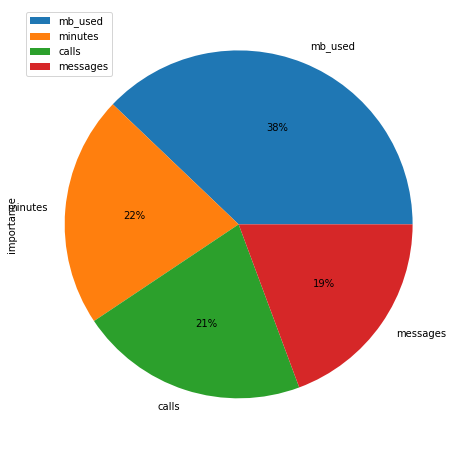

In [ ]:
feature_importance = pd.DataFrame({'feature': list(features_train.columns),
                   'importance': model.feature_importances_}).\
                    sort_values('importance', ascending = False)
feature_importance=feature_importance.set_index(feature_importance['feature'])
feature_importance.plot.pie(y='importance', autopct='%1.0f%%', figsize=(8, 8))

Наиболе значимым параметром, влияющим на выбоор тарифа, является израсходованный интернет-трафик.

## Проверка модели на тестовой выборке

In [ ]:
predictions_test = best_model.predict(features_test)
print(accuracy_score(target_test,predictions_test))


0.7978227060653188


## (бонус) Проверьте модели на адекватность

In [ ]:
is_ultra_0 = (2229/3214)*0.5
is_ultra_1 = (985/3214)*0.5
print(is_ultra_0+is_ultra_1)

0.5


## Вывод

При выборе тарифа наиболее важным фактором оказался интернет-трафик, израсходованный абонентом. 

С помощью построенной модели можно с высокой долей успешности рекомендовать абоненту перейти на наиболее интересный для него тариф.